## Question 1

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


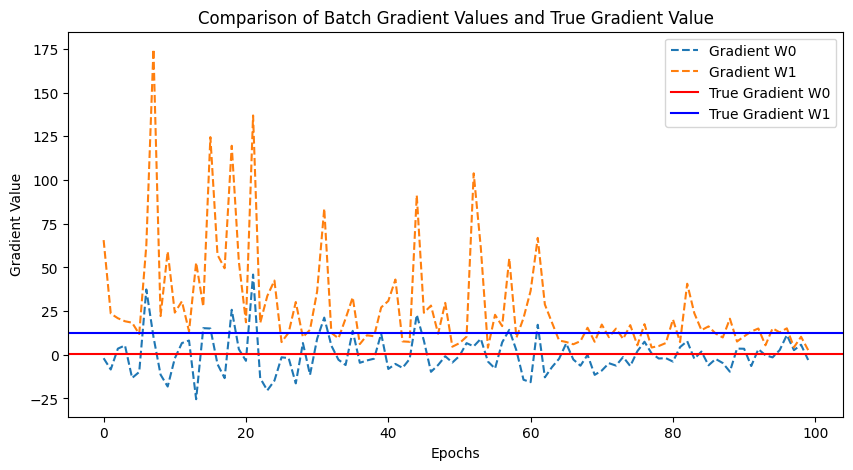

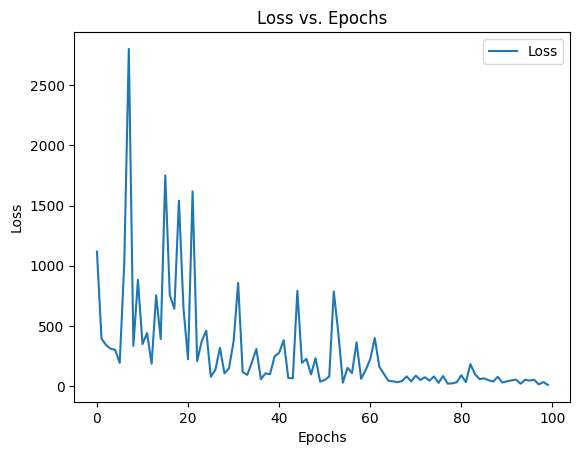

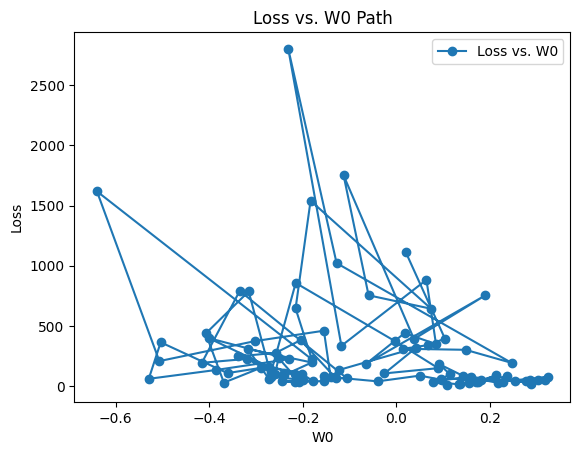

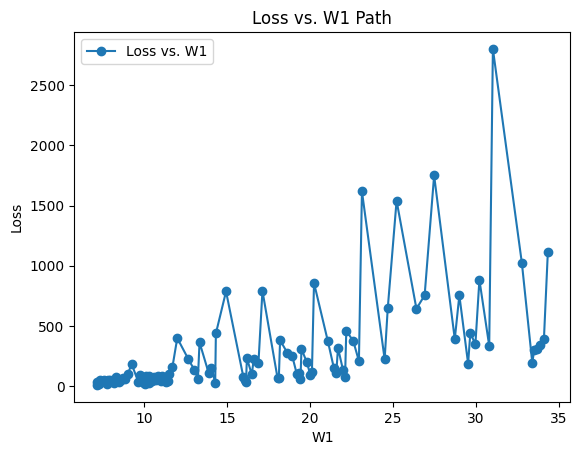

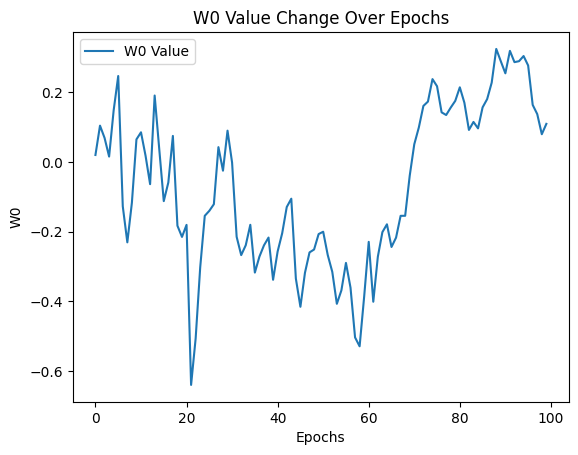

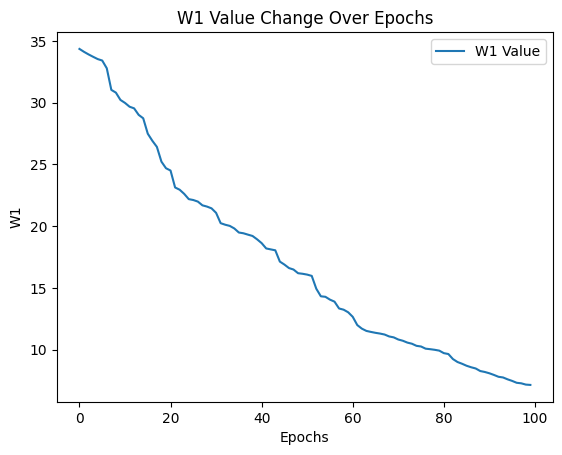

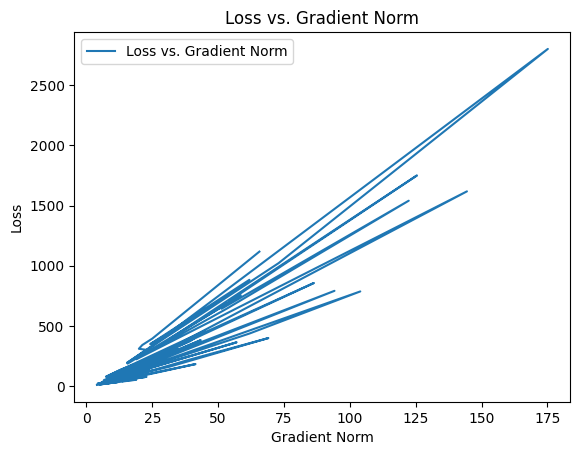

In [2]:
import pandas as pd
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt

drive.mount("/content/drive")

df = pd.read_csv("/content/drive/MyDrive/Course Work/Sem 4/Data Analysis and Visualization/Homework 2/DIstanceTimeDataset - StudentsHomeTownDistance.csv")

cols = df.columns.tolist()
columns_to_drop = cols[6:]
df.drop(columns_to_drop, axis=1, inplace=True)

nan_df = df[df.isna().any(axis=1)]
rows_to_drop = nan_df.index.tolist()
df.drop(rows_to_drop, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

## Normalizing the features
time = df[cols[1]]
distance = df[cols[2]]
time_normalized = (time - time.mean()) / time.std()
distance_normalized = (distance - distance.mean()) / distance.std()

X = time_normalized.values.reshape(-1, 1)
y = distance_normalized.values.reshape(-1, 1)

## Parameters for batch gradient descent
W = np.array([0, 35], dtype=float)
learning_rate = 0.01
num_epochs = 100
batch_size = 8
num_samples = X.shape[0]

gradient_history = []
loss_history = []
W0_history = []
W1_history = []
gradient_norm_history = []

for epoch in range(num_epochs):
    batch = np.random.choice(df.index, size=8, replace=True)
    X_batch = X[batch]
    y_batch = y[batch]
    y_pred = W[0] + W[1] * X_batch
    loss = np.mean((y_batch - y_pred) ** 2)
    loss_history.append(loss)

    gradient_W0 = -2 * np.sum(y_batch - y_pred) / batch_size
    gradient_W1 = -2 * np.sum((y_batch - y_pred) * X_batch) / batch_size
    gradient = np.array([gradient_W0, gradient_W1])
    gradient_history.append(gradient)

    W = W - learning_rate * gradient
    W0_history.append(W[0])
    W1_history.append(W[1])
    gradient_norm_history.append(np.linalg.norm(gradient))

gradient_history = np.array(gradient_history)

mean_gradient_W0 = np.mean(gradient_history[:, 0])
mean_gradient_W1 = np.mean(gradient_history[:, 1])
mean_gradient = np.array([mean_gradient_W0, mean_gradient_W1])

cov_matrix = np.cov(gradient_history.T)

y_pred_full = W[0] + W[1] * X
true_gradient_W0 = -2 * np.sum(y - y_pred_full) / num_samples
true_gradient_W1 = -2 * np.sum((y - y_pred_full) * X) / num_samples
true_gradient = np.array([true_gradient_W0, true_gradient_W1])

plt.figure(figsize=(10, 5))
plt.plot(gradient_history[:, 0], label="Gradient W0", linestyle='dashed')
plt.plot(gradient_history[:, 1], label='Gradient W1', linestyle='dashed')
plt.axhline(true_gradient[0], color='r', linestyle='solid', label='True Gradient W0')
plt.axhline(true_gradient[1], color='b', linestyle='solid', label='True Gradient W1')
plt.xlabel('Epochs')
plt.ylabel('Gradient Value')
plt.legend()
plt.title('Comparison of Batch Gradient Values and True Gradient Value')
plt.show()

# Plot Loss vs. Epochs
plt.figure()
plt.plot(loss_history, label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()

# Plot Loss vs. W0
plt.figure()
plt.plot(W0_history, loss_history, label='Loss vs. W0', marker='o')
plt.xlabel('W0')
plt.ylabel('Loss')
plt.title('Loss vs. W0 Path')
plt.legend()
plt.show()

# Plot Loss vs. W1
plt.figure()
plt.plot(W1_history, loss_history, label='Loss vs. W1', marker='o')
plt.xlabel('W1')
plt.ylabel('Loss')
plt.title('Loss vs. W1 Path')
plt.legend()
plt.show()

# Plot W0 vs. Epochs
plt.figure()
plt.plot(W0_history, label='W0 Value')
plt.xlabel('Epochs')
plt.ylabel('W0')
plt.title('W0 Value Change Over Epochs')
plt.legend()
plt.show()

# Plot W1 vs. Epochs
plt.figure()
plt.plot(W1_history, label='W1 Value')
plt.xlabel('Epochs')
plt.ylabel('W1')
plt.title('W1 Value Change Over Epochs')
plt.legend()
plt.show()

# Plot Loss vs. Gradient Norm
plt.figure()
plt.plot(gradient_norm_history, loss_history, label='Loss vs. Gradient Norm')
plt.xlabel('Gradient Norm')
plt.ylabel('Loss')
plt.title('Loss vs. Gradient Norm')
plt.legend()
plt.show()


1. Random batches are created for 100 number of batches
2. Each rabdom batch has a size of 8
3. Mean is calculated for both the gradients (gradients of both the parameters involved)
4. Covariance matrix is calculated keeping in account both the gradients
5. Visualization showing the true gradient values and also the gradient values vs number of epochs, for both the parameters involved
6. The path for both the gradient values are shown in the graph plotted
7. The path for both the parameter values are shown in the graph plotted, in terms of the number of epochs, and also in terms of the loss function
8. Variation of the loss function with the number of epochs is shown
9. The plot of the loss function with the gradient norm is shown
10. Answer to all the questions asked are present in the latex file submitted


# Question 2
# Submitted in latex, because those questions were Math Based

## Question 3

In [3]:
import pandas as pd
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [4]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df = pd.read_csv("/content/drive/MyDrive/Course Work/Sem 4/Data Analysis and Visualization/Homework 2/DSAICourseInterestRelevanceSurvey - Original.csv")

In [6]:
df.head()

,Unnamed: 0,MAL100,MAL101,MAL403,EEL101,ECL101,BML101,CSL100,CSL201,CSL202,DSL201,Unnamed: 11,Unnamed: 12,"Please fill values {1,2,3,4,5}",Unnamed: 14
0,Student 1,4.0,3.0,4.0,1.0,1.0,1.0,4.0,5.0,5.0,5.0,3.3,NaN,Legend,NaN
1,Student 2,3.0,3.0,3.0,1.0,1.0,1.0,4.0,5.0,5.0,5.0,3.1,NaN,1,Neither interesting nor relevant
2,Student 3,4.0,4.0,3.0,3.0,4.0,2.0,4.0,5.0,4.0,NaN,3.7,NaN,2,"Little interesting, but relevance not clear. O..."
3,Student 4,3.0,4.0,4.0,1.0,1.0,1.0,5.0,5.0,5.0,2.0,3.1,NaN,3,Somewhat interesting and somewhat relevant
4,Student 5,3.0,3.0,4.0,3.0,3.0,2.0,4.0,5.0,5.0,4.0,3.6,NaN,4,Interesting and Relevant


In [7]:
cols = df.columns.tolist()

In [8]:
cols

['Unnamed: 0',
 'MAL100',
 'MAL101',
 'MAL403',
 'EEL101',
 'ECL101',
 'BML101',
 'CSL100',
 'CSL201',
 'CSL202',
 'DSL201',
 'Unnamed: 11',
 'Unnamed: 12',
 'Please fill values {1,2,3,4,5}',
 'Unnamed: 14']

In [9]:
df.rename(columns={cols[0]:"Student ID"}, inplace=True)

In [10]:
columns_to_drop = cols[12:]

In [11]:
df.drop(columns_to_drop, axis=1, inplace=True)

In [12]:
df.head()

,Student ID,MAL100,MAL101,MAL403,EEL101,ECL101,BML101,CSL100,CSL201,CSL202,DSL201,Unnamed: 11
0,Student 1,4.0,3.0,4.0,1.0,1.0,1.0,4.0,5.0,5.0,5.0,3.3
1,Student 2,3.0,3.0,3.0,1.0,1.0,1.0,4.0,5.0,5.0,5.0,3.1
2,Student 3,4.0,4.0,3.0,3.0,4.0,2.0,4.0,5.0,4.0,NaN,3.7
3,Student 4,3.0,4.0,4.0,1.0,1.0,1.0,5.0,5.0,5.0,2.0,3.1
4,Student 5,3.0,3.0,4.0,3.0,3.0,2.0,4.0,5.0,5.0,4.0,3.6


In [13]:
df

,Student ID,MAL100,MAL101,MAL403,EEL101,ECL101,BML101,CSL100,CSL201,CSL202,DSL201,Unnamed: 11
0,Student 1,4.0,3.0,4.0,1.0,1.0,1.0,4.0,5.0,5.0,5.0,3.3
1,Student 2,3.0,3.0,3.0,1.0,1.0,1.0,4.0,5.0,5.0,5.0,3.1
2,Student 3,4.0,4.0,3.0,3.0,4.0,2.0,4.0,5.0,4.0,NaN,3.7
3,Student 4,3.0,4.0,4.0,1.0,1.0,1.0,5.0,5.0,5.0,2.0,3.1
4,Student 5,3.0,3.0,4.0,3.0,3.0,2.0,4.0,5.0,5.0,4.0,3.6
5,Student 6,3.0,3.0,5.0,1.0,1.0,1.0,4.0,5.0,5.0,5.0,3.3
6,Student 7,3.0,4.0,4.0,1.0,1.0,1.0,4.0,4.0,4.0,5.0,3.1
7,Student 8,3.0,4.0,2.0,2.0,3.0,2.0,4.0,4.0,4.0,5.0,3.3
8,Student 9,3.0,4.0,4.0,2.0,3.0,1.0,4.0,4.0,4.0,4.0,3.3
9,Student 10,4.0,4.0,3.0,3.0,2.0,2.0,4.0,4.0,5.0,4.0,3.5


In [14]:
df.drop([24],axis=0,inplace=True)

In [15]:
df

,Student ID,MAL100,MAL101,MAL403,EEL101,ECL101,BML101,CSL100,CSL201,CSL202,DSL201,Unnamed: 11
0,Student 1,4.0,3.0,4.0,1.0,1.0,1.0,4.0,5.0,5.0,5.0,3.3
1,Student 2,3.0,3.0,3.0,1.0,1.0,1.0,4.0,5.0,5.0,5.0,3.1
2,Student 3,4.0,4.0,3.0,3.0,4.0,2.0,4.0,5.0,4.0,NaN,3.7
3,Student 4,3.0,4.0,4.0,1.0,1.0,1.0,5.0,5.0,5.0,2.0,3.1
4,Student 5,3.0,3.0,4.0,3.0,3.0,2.0,4.0,5.0,5.0,4.0,3.6
5,Student 6,3.0,3.0,5.0,1.0,1.0,1.0,4.0,5.0,5.0,5.0,3.3
6,Student 7,3.0,4.0,4.0,1.0,1.0,1.0,4.0,4.0,4.0,5.0,3.1
7,Student 8,3.0,4.0,2.0,2.0,3.0,2.0,4.0,4.0,4.0,5.0,3.3
8,Student 9,3.0,4.0,4.0,2.0,3.0,1.0,4.0,4.0,4.0,4.0,3.3
9,Student 10,4.0,4.0,3.0,3.0,2.0,2.0,4.0,4.0,5.0,4.0,3.5


In [16]:
cols = df.columns.tolist()
n = len(cols)
column_to_drop = cols[n-1]
df.drop([column_to_drop],axis=1,inplace=True)

In [17]:
df

,Student ID,MAL100,MAL101,MAL403,EEL101,ECL101,BML101,CSL100,CSL201,CSL202,DSL201
0,Student 1,4.0,3.0,4.0,1.0,1.0,1.0,4.0,5.0,5.0,5.0
1,Student 2,3.0,3.0,3.0,1.0,1.0,1.0,4.0,5.0,5.0,5.0
2,Student 3,4.0,4.0,3.0,3.0,4.0,2.0,4.0,5.0,4.0,NaN
3,Student 4,3.0,4.0,4.0,1.0,1.0,1.0,5.0,5.0,5.0,2.0
4,Student 5,3.0,3.0,4.0,3.0,3.0,2.0,4.0,5.0,5.0,4.0
5,Student 6,3.0,3.0,5.0,1.0,1.0,1.0,4.0,5.0,5.0,5.0
6,Student 7,3.0,4.0,4.0,1.0,1.0,1.0,4.0,4.0,4.0,5.0
7,Student 8,3.0,4.0,2.0,2.0,3.0,2.0,4.0,4.0,4.0,5.0
8,Student 9,3.0,4.0,4.0,2.0,3.0,1.0,4.0,4.0,4.0,4.0
9,Student 10,4.0,4.0,3.0,3.0,2.0,2.0,4.0,4.0,5.0,4.0


In [18]:
df.drop(["Student ID"],axis=1,inplace=True)

In [19]:
def introduce_missing_data(df, missing_percentage):
    df_missing = df.copy()
    num_missing = int(df.size * missing_percentage)
    missing_indices = np.random.choice(df.size, num_missing, replace=False)
    df_missing.values.ravel()[missing_indices] = np.nan
    return df_missing

In [20]:
def predict_missing_values(df):
    df_filled = df.copy()
    mse_scores = []

    for col in df.columns:
        if df[col].isnull().any():
            # Separate data into training and missing sets
            known_data = df_filled[df_filled[col].notnull()]
            unknown_data = df_filled[df_filled[col].isnull()]

            # Features and targets
            X_known = known_data.drop(columns=[col])
            y_known = known_data[col]

            X_unknown = unknown_data.drop(columns=[col])

            # Train a Linear Regression model
            model = LinearRegression()
            model.fit(X_known, y_known)

            # Predict missing values
            predicted_values = model.predict(X_unknown)
            df_filled.loc[unknown_data.index, col] = predicted_values

            # Evaluate using MSE (if possible)
            X_train, X_test, y_train, y_test = train_test_split(X_known, y_known, test_size=0.2, random_state=42)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            mse = mean_squared_error(y_test, y_pred)
            mse_scores.append(mse)

    return df_filled, mse_scores

In [21]:
def visualize_results(original, predicted):
    plt.figure(figsize=(10, 6))
    plt.scatter(original, predicted, alpha=0.6, edgecolors='k')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted Values')
    plt.grid(True)
    plt.show()

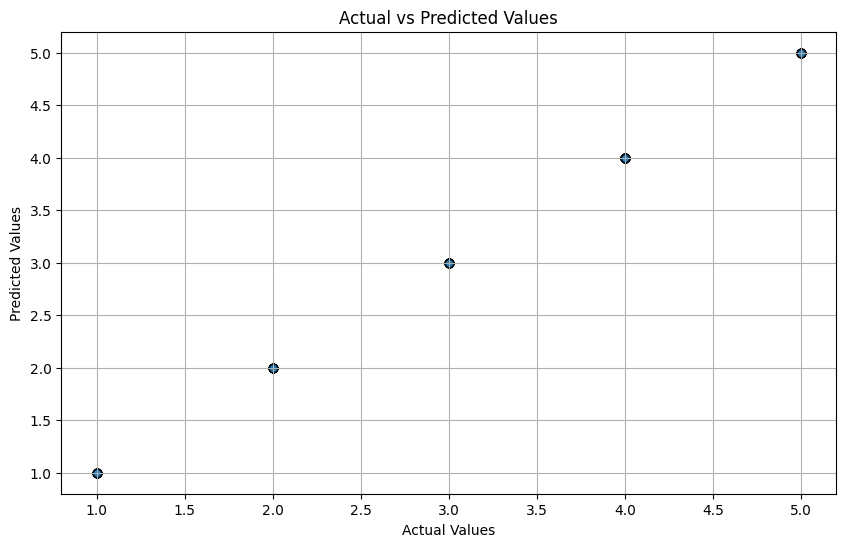

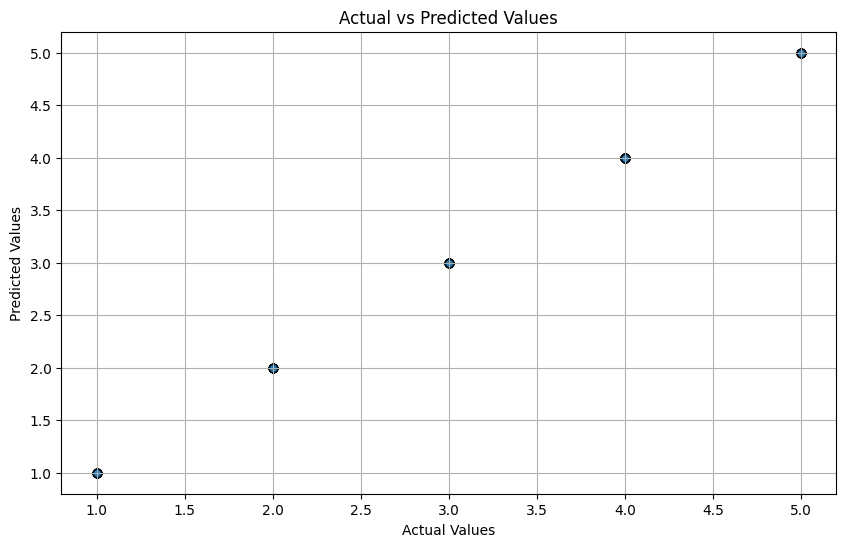

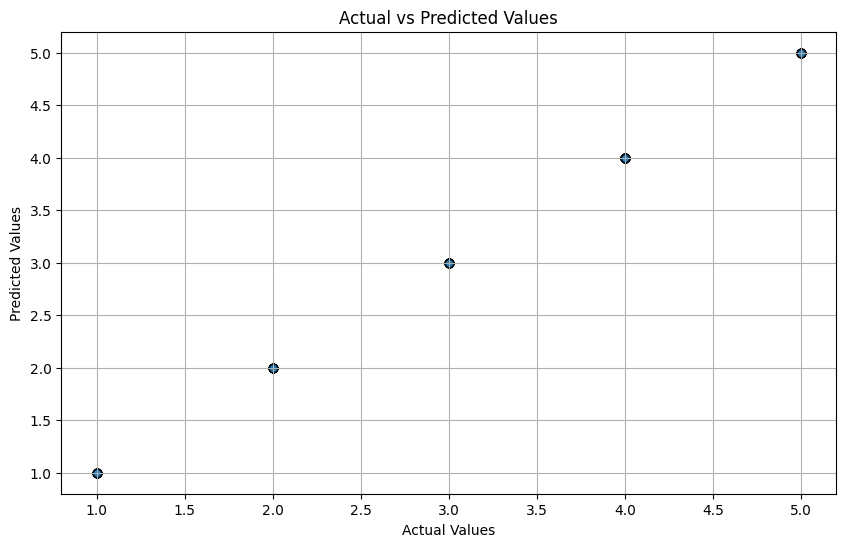

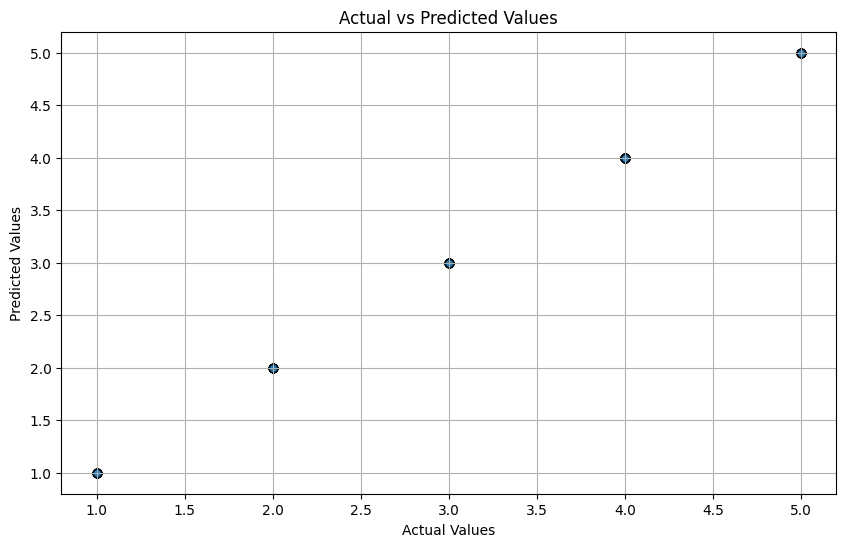

In [22]:
missing_percentages = [0.2, 0.4, 0.6, 0.8]

for missing_percentage in missing_percentages:
    df_missing = introduce_missing_data(df, missing_percentage)
    df_filled, mse_scores = predict_missing_values(df_missing)
    visualize_results(df_missing, df_filled)